<a href="https://colab.research.google.com/github/Thibisay/Proyecto-SIC-cubitUCV/blob/rama_gabo/LimpiezaDataUsuarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Importaciones
import kagglehub, pandas as pd, os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
path = kagglehub.dataset_download("svanoo/myanimelist-dataset")

Resuming download from 76546048 bytes (1839866299 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/svanoo/myanimelist-dataset?dataset_version_number=2 (76546048/1916412347) bytes left.


100%|██████████| 1.78G/1.78G [01:26<00:00, 21.2MB/s]

Extracting files...


In [ ]:
user_dataset = pd.read_csv(f"{path}/user.csv", sep = '\t',on_bad_lines='skip')
print(user_dataset.info())
user_dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123284 entries, 0 to 1123283
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1123283 non-null  object 
 1   user_url           1123284 non-null  object 
 2   last_online_date   1123284 non-null  object 
 3   num_watching       1123284 non-null  int64  
 4   num_completed      1123284 non-null  int64  
 5   num_on_hold        1123284 non-null  int64  
 6   num_dropped        1123284 non-null  int64  
 7   num_plan_to_watch  1123284 non-null  int64  
 8   num_days           1123284 non-null  float64
 9   mean_score         1123284 non-null  float64
 10  clubs              221330 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 94.3+ MB
None


,user_id,user_url,last_online_date,num_watching,num_completed,num_on_hold,num_dropped,num_plan_to_watch,num_days,mean_score,clubs
0,kir1yama,https://myanimelist.net/profile/Kir1yama,2021-08-27 15:46:00,28,606,48,48,113,228.4,6.69,NaN
1,smatster,https://myanimelist.net/profile/smatster,2022-02-25 11:13:03,46,1188,209,31,2759,212.1,8.38,29299|70446|379|36473|907
2,suzuhrevv,https://myanimelist.net/profile/SuzuhRevv,2022-02-21 20:02:48,47,517,180,52,211,216.9,6.04,NaN
3,pheseantnetsuke,https://myanimelist.net/profile/PheseantNetsuke,2022-02-21 16:29:01,53,368,57,44,16,97.0,7.22,NaN
4,skyuchiha,https://myanimelist.net/profile/SkyUchiha,2022-02-21 20:57:00,77,1038,220,76,1094,231.1,7.67,8652|10571|1465|5860|42215|9311|16428|3907|138...


In [ ]:
#@title Si se tiene el archivo
anime_dataset = pd.read_csv("anime_with_emotions.csv")

In [ ]:
# Elimina las filas con valores nulos en la columna 'user_id' de forma directa
user_dataset.dropna(subset=['user_id'], inplace=True)

# Elimina la columna 'clubs'
user_dataset.drop(columns=['clubs'], inplace=True)

user_dataset.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1123283 entries, 0 to 1123283
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1123283 non-null  object 
 1   user_url           1123283 non-null  object 
 2   last_online_date   1123283 non-null  object 
 3   num_watching       1123283 non-null  int64  
 4   num_completed      1123283 non-null  int64  
 5   num_on_hold        1123283 non-null  int64  
 6   num_dropped        1123283 non-null  int64  
 7   num_plan_to_watch  1123283 non-null  int64  
 8   num_days           1123283 non-null  float64
 9   mean_score         1123283 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 94.3+ MB


In [ ]:
#@title preprocesamiento de anime.csv
anime_dataset = pd.read_csv(f"{path}/anime.csv", sep = '\t',on_bad_lines='skip')



anime_dataset.columns = anime_dataset.columns.str.lower()
anime_dataset.columns = anime_dataset.columns.str.replace(' ', '_')

anime_dataset = anime_dataset[anime_dataset['anime_id'] != 44303] # anime que cumple con los 200 caracteres en synopsis pero no contiene datos utiles para su estudio
anime_dataset_filt = pd.DataFrame(anime_dataset[ anime_dataset["synopsis"].str.len() >= 200 ])
anime_dataset_filt = anime_dataset_filt.sort_values(by='popularity_rank')
anime_dataset_filt = anime_dataset_filt.dropna(subset=['score'])
anime_dataset_filt.index = range(0,len(anime_dataset_filt))


col_delete_list = ["genres","score_count", "score_rank","type", "status", "num_episodes", "start_date",
                   "end_date", "season", "studios", "clubs", "score_01_count",
                   "score_02_count", "score_03_count", "score_04_count", "score_05_count",
                   "score_06_count", "score_07_count", "score_08_count", "score_09_count",
                   "score_10_count", "num_episodes", "watching_count",
                   "completed_count","on_hold_count","dropped_count"]

filter_columns = list(filter(lambda x: True if x not in col_delete_list else False, list(anime_dataset_filt.columns)))

anime_dataset_filt = anime_dataset_filt[filter_columns]

anime_dataset_filt['longitud_synopsis_caracteres'] = anime_dataset_filt['synopsis'].apply(len)

print(anime_dataset_filt.info())
anime_dataset_filt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anime_id                      7584 non-null   int64  
 1   anime_url                     7584 non-null   object 
 2   title                         7584 non-null   object 
 3   synopsis                      7584 non-null   object 
 4   main_pic                      7584 non-null   object 
 5   source_type                   7584 non-null   object 
 6   score                         7584 non-null   float64
 7   popularity_rank               7584 non-null   int64  
 8   members_count                 7584 non-null   int64  
 9   favorites_count               7584 non-null   int64  
 10  plan_to_watch_count           7584 non-null   int64  
 11  total_count                   7584 non-null   int64  
 12  pics                          7584 non-null   object 
 13  lon

,anime_id,anime_url,title,synopsis,main_pic,source_type,score,popularity_rank,members_count,favorites_count,plan_to_watch_count,total_count,pics,longitud_synopsis_caracteres
0,16498,https://myanimelist.net/anime/16498/Shingeki_n...,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...",https://cdn.myanimelist.net/images/anime/10/47...,Manga,8.52,1,3329298,148196,152089,3329298,https://cdn.myanimelist.net/images/anime/5/445...,1133
1,1535,https://myanimelist.net/anime/1535/Death_Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",https://cdn.myanimelist.net/images/anime/9/945...,Manga,8.61,2,3321130,151551,206058,3321130,https://cdn.myanimelist.net/images/anime/9/945...,1022
2,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,https://cdn.myanimelist.net/images/anime/1223/...,Manga,9.03,3,2815980,197551,419605,2815980,https://cdn.myanimelist.net/images/anime/13/13...,1139
3,30276,https://myanimelist.net/anime/30276/One_Punch_Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,https://cdn.myanimelist.net/images/anime/12/76...,Web manga,8.49,4,2723278,56545,163231,2723278,https://cdn.myanimelist.net/images/anime/7/725...,981
4,11757,https://myanimelist.net/anime/11757/Sword_Art_...,Sword Art Online,"In the year 2022, virtual reality has progress...",https://cdn.myanimelist.net/images/anime/11/39...,Light novel,7.19,5,2695325,63171,144570,2695325,https://cdn.myanimelist.net/images/anime/8/363...,1220


In [ ]:

# Listar los archivos de la carpeta
archivos_user = os.listdir(path)

# Eliminar los archivos especificados
elementos_a_eliminar = ["user_user.csv", "anime.csv", "anime_anime.csv","user.csv"]
lista_archivos = [item for item in archivos_user if item not in elementos_a_eliminar] # solo deja los nombres de los archivos de usuario


In [ ]:
users_list = []
for archivo in lista_archivos:
    usuario = pd.read_csv(f"{path}/{archivo}", sep='\t', on_bad_lines='skip')
    usuario = usuario[usuario['anime_id'].isin(anime_dataset['anime_id'])]
    df_grouped = usuario.groupby("user_id", as_index=False).agg({"anime_id": list})
    users_list.append(df_grouped)

users = pd.concat(users_list, ignore_index=True)


<ipython-input-11-90339d1bce0f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  usuario = pd.read_csv(f"{path}/{archivo}", sep='\t', on_bad_lines='skip')
<ipython-input-11-90339d1bce0f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  usuario = pd.read_csv(f"{path}/{archivo}", sep='\t', on_bad_lines='skip')
<ipython-input-11-90339d1bce0f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  usuario = pd.read_csv(f"{path}/{archivo}", sep='\t', on_bad_lines='skip')
<ipython-input-11-90339d1bce0f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  usuario = pd.read_csv(f"{path}/{archivo}", sep='\t', on_bad_lines='skip')
<ipython-input-11-90339d1bce0f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  usuario = pd.read_c

In [ ]:
users = users[users["user_id"] != "-------"]
users = users.groupby("user_id", as_index=False).agg({
    "anime_id": lambda listas: sum(listas, [])
})
users.info()
users.head(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048759 entries, 0 to 1048758
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1048759 non-null  object
 1   anime_id  1048759 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


,user_id,anime_id
0,----------yea,"[10080, 10087, 10110, 10163, 10396, 10397, 104..."
1,-------m-------,"[11061, 11771, 1279, 1535, 1575, 16498, 16894,..."
2,------____------,"[10087, 10161, 10163, 10507, 10620, 10793, 110..."
3,-----____----,"[1, 10012, 1002, 10087, 10163, 1034, 10620, 10..."
4,----2o,"[1, 10012, 1002, 10030, 10087, 10110, 10161, 1..."
...,...,...
995,-fuyu-chan-,"[10030, 12355, 12365, 164, 16498, 18115, 19815..."
996,-fuyuki_,"[1, 10012, 10020, 10030, 10067, 10080, 10087, ..."
997,-fuze,"[10793, 11061, 11617, 11757, 11771, 12189, 122..."
998,-fwen-,"[1, 10080, 10119, 10165, 10397, 10620, 10719, ..."


In [ ]:
#@title INFORMACIÓN DE LOS DATA FRAME
user_dataset = user_dataset[user_dataset['user_id'].isin(users['user_id'])]
print("users \n")
users.info()

print("\n users_dataset \n")
user_dataset.info()


users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048759 entries, 0 to 1048758
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1048759 non-null  object
 1   anime_id  1048759 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB

 users_dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 1048759 entries, 0 to 1123283
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1048759 non-null  object 
 1   user_url           1048759 non-null  object 
 2   last_online_date   1048759 non-null  object 
 3   num_watching       1048759 non-null  int64  
 4   num_completed      1048759 non-null  int64  
 5   num_on_hold        1048759 non-null  int64  
 6   num_dropped        1048759 non-null  int64  
 7   num_plan_to_watch  1048759 non-null  int64  
 8   num_days           1048759 non-null  float64
 9 

In [ ]:
fila = users.iloc[1]
id_anime = fila['anime_id']  # O usa .iloc[1] si estás seguro de la estructura.
print("id_anime:", id_anime)

resultado = anime_dataset_filt[anime_dataset_filt['anime_id'] == id_anime[1]] # Mostrar las filas que cumplen la condición resultado
resultado

id_anime: [11061, 11771, 1279, 1535, 1575, 16498, 16894, 170, 1735, 19, 20, 2004, 20507, 23283, 23755, 24415, 2559, 25777, 2618, 283, 28497, 2987, 30, 3002, 302, 31964, 3199, 323, 32998, 3327, 33478, 33486, 34577, 3460, 35760, 3588, 36028, 36407, 36456, 3701, 37520, 37521, 37779, 38000, 38524, 38691, 3946, 39535, 39701, 40028, 40623, 440, 44942, 5114, 58, 6702, 6774, 6987, 708, 709, 8861, 9253, 9919]


,anime_id,anime_url,title,synopsis,main_pic,source_type,score,popularity_rank,members_count,favorites_count,plan_to_watch_count,total_count,pics,longitud_synopsis_caracteres
107,11771,https://myanimelist.net/anime/11771/Kuroko_no_...,Kuroko no Basket,"For the last three years, Teikou Middle School...",https://cdn.myanimelist.net/images/anime/11/50...,Manga,8.06,108,1031903,19301,143743,1031903,https://cdn.myanimelist.net/images/anime/9/344...,1293


In [3]:
anime_with_emotions = pd.read_csv('./anime_with_emotions.csv')
anime_with_emotions

,anime_id,fear,sadness,neutral,joy,anger,surprise,disgust
0,16498,0.930178,0.002300,0.006931,0.000917,0.027780,0.002147,0.029748
1,1535,0.085855,0.015855,0.034499,0.002459,0.053454,0.001762,0.806115
2,5114,0.752298,0.029428,0.014101,0.001377,0.105504,0.003924,0.093368
3,30276,0.014385,0.011197,0.043884,0.004364,0.010014,0.911681,0.004475
4,11757,0.104916,0.042347,0.239856,0.006279,0.087860,0.008804,0.509938
...,...,...,...,...,...,...,...,...
7579,39331,0.003019,0.002221,0.928283,0.031547,0.010396,0.018052,0.006482
7580,40474,0.005328,0.004118,0.861680,0.033735,0.004688,0.016691,0.073760
7581,40361,0.000982,0.008691,0.822527,0.086056,0.003946,0.073903,0.003895
7582,39704,0.941348,0.002037,0.003745,0.005805,0.018552,0.007465,0.021048


In [22]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(anime_with_emotions.iloc[:, 1:])




In [26]:
wcss = []
for k in range(7, 60):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

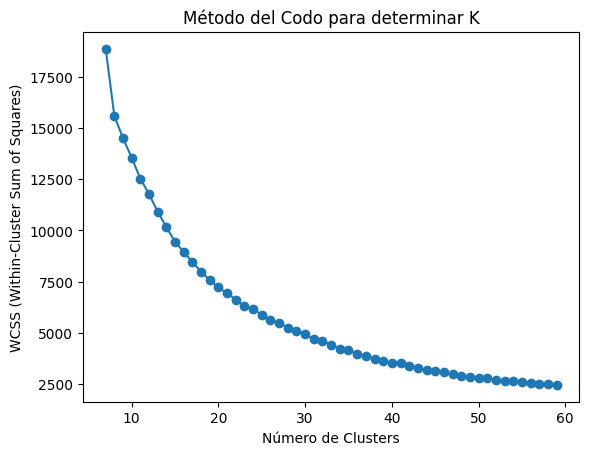

In [27]:


plt.plot(range(7, 60), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método del Codo para determinar K")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)

In [30]:
anime_with_emotions["Cluster"] = kmeans.fit_predict(X_scaled)
# 📌 3. Mostrar resultados
print(anime_with_emotions[["anime_id", "Cluster"]])

# 📌 4. Visualizar clusters (Usamos PCA para reducir dimensiones a 2D)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



      anime_id  Cluster
0        16498        5
1         1535       10
2         5114        5
3        30276        3
4        11757        7
...        ...      ...
7579     39331       11
7580     40474       11
7581     40361       17
7582     39704        5
7583     50110        3

[7584 rows x 2 columns]


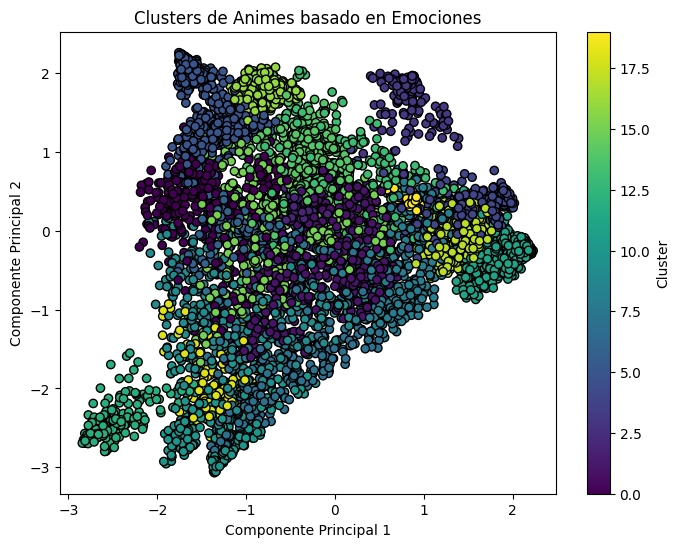

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anime_with_emotions["Cluster"], cmap="viridis", edgecolors="k")
# for i, txt in enumerate(anime_with_emotions["anime_id"]):
#     plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=10, alpha=0.7)

plt.title("Clusters de Animes basado en Emociones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()